#Tiền xử lý

In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Input, LSTM, Bidirectional, Conv1D
from keras.layers import Dropout, Embedding
from keras.preprocessing import text, sequence
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.models import Model
from keras import backend as K
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
import pickle


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##cài đặt thư viện

In [ ]:
pip install pyvi

In [ ]:
import pandas as pd 
import re
import sys
from pyvi.ViTokenizer import ViTokenizer
import numpy as np

##Đọc dữ liệu

In [ ]:
import pandas as pd 
import numpy as np 

DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/train.csv'
DEV_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/dev.csv'
TEST_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/test.csv'

# read data
train_data = pd.read_csv(DATA)
dev_data = pd.read_csv(DEV_DATA)
test_data = pd.read_csv(TEST_DATA)

print(len(train_data))
print(len(dev_data))
print(len(test_data))

X_train = train_data['free_text']
y_train = train_data['label_id'].values

X_dev = dev_data['free_text']
y_dev = dev_data['label_id'].values

X_test = test_data['free_text']
y_test = test_data['label_id'].values

24048
2672
6680


In [ ]:
X_train

0        Em được làm fan cứng luôn rồi nè ❤️ reaction q...
1        Đúng là bọn mắt híp lò xo thụt :))) bên việt n...
2                 Đậu Văn Cường giờ giống thằng sida hơn à
3        CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...
4        Từ lý thuyết đến thực hành là cả 1 câu chuyện ...
                               ...                        
24043                    Thả tim cho sự cống hiến của ngài
24044                                               Thua !
24045    Ở Việt Nam thì có khánh sky..hải ngoại có trần...
24046      1:22 ai lớp du chu cờ moo, Duyên dáng quá cô ơi
24047    Cụ này mắt mới cắt mý sao ta kkk đấy vnch đấy ...
Name: free_text, Length: 24048, dtype: object

In [ ]:
X_test

0                        Đừng cố biện minh =)))) choi lon
1                         Haizz. Nthe này thì dân khổ quá
2       the nay ma chi phat gay roi trat tu cong cong ...
3                   Mua cho em hộp bcs mĩ sài cho oai :))
4                                            coin card :3
                              ...                        
6675                  Nghe cũng được. Nhưng vẫn cày views
6676    Pha team up căng cực đến từ vị trí ông chủ đầm...
6677    Thanh Nhường sao m đọc đc cmt của t thế tiên s...
6678    Đúng rồi, nhìn có ria mép , với mặt giống đàn ...
6679    Chưa chắc Mỹ bị nhiễm virus corona Vũ hán (của...
Name: free_text, Length: 6680, dtype: object

##Chuẩn hóa Unicode tiếng Việt

In [ ]:
import regex as re
 
uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"
 
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

dicchar = loaddicchar()
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    return re.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [ ]:
def unicode(df):
  for i in range(df.shape[0]):
    tmp = df.iloc[i]
    tmp =str(tmp)
    tmp =covert_unicode(tmp)
    df.iloc._setitem_with_indexer(i,tmp)
  return df

##Lọc các link spam

In [ ]:
spam_list = ['http','Http','HTTP','.com','.vn','.net']
def remove_spam_link(df):
  for i in range(df.shape[0]):
      tmp = df.loc[i]
      tmp =str(tmp)
      for link in spam_list:
        if link in tmp:
          df.iloc._setitem_with_indexer(i,'')
          break
  return df

##Chuyển đổi các từ teencode, sai chính tả về chuẩn

In [ ]:
pip install viet_text_tools


In [ ]:
import viet_text_tools as vtt
def chuanhoadauchinhta(df):
  for i in range(df.shape[0]):
    tmp = df.iloc[i]
    tmp = str(tmp)
    tmp = vtt.normalize_diacritics(tmp)
    df.iloc._setitem_with_indexer(i,tmp)
  return df

In [ ]:
def LoadRuleDict(file_path):
	'''Load the dictionary file contain rules to correct spelling error (such as dk, hog ->được, không)'''
	
	df = pd.read_excel(file_path)
	the_dict = df.to_dict()
	rule_dict = {}
	for k, v in the_dict.items():
		for key, elem in v.items():
			if type(elem) == str:
				rule_dict[elem] = k
				
	return rule_dict

In [ ]:
rule_dict = LoadRuleDict('/content/drive/MyDrive/Dinh++/preprocessing/Copy of Loi_ngu_phap (1).xlsx')

In [ ]:
def ChangeWord(sentence, the_list, rule_dict):

	word_list = []
	change = False
	new_sentence = sentence
	for word in the_list:
		if word in rule_dict:
			word = rule_dict[word]
			change = True
		word_list.append(word)
		if change:
			new_sentence = " ".join(word_list)
	return new_sentence

In [ ]:
def chuanhoasaichinhta(df):
  for i in range(df.shape[0]):
    tmp = df.iloc[i]
    tmp = str(tmp)
    tmp = ChangeWord(tmp,tmp.split(),rule_dict)
    df.iloc._setitem_with_indexer(i,tmp)
  return df

In [ ]:
records = ["lol ngu", "oc cho", " có cái nịt j mà nói kkk", "ngày 07 đêm 03"," 35 may mắn"]
df = pd.DataFrame(data = records, columns = ['sentens'])

In [ ]:
print(chuanhoasaichinhta(df))

                                             sentens
0             sentens lồn ngu Name: 0, dtype: object
1          sentens    oc cho\nName: 1, dtype: object
2  sentens có cái nịt j mà nói ha ha Name: 2, dty...
3  sentens    ngày 07 đêm 03\nName: 3, dtype: object
4     sentens     35 may mắn\nName: 4, dtype: object


##Chuyển đổi các danh từ riêng thành NER

In [ ]:
P = re.compile("[A-Z]\w+(?:\s[A-Z]\w+)+")
def replace_NER(df):
  lst = []
  for i in range(df.shape[0]):
    tmp = df.iloc[i]
    tmp = str(tmp)
    ner = P.findall(tmp)
    for i in ner:
     lst.append(i)
  for ner in lst:
      df = df.str.replace(ner, 'NER')
  df =df.apply(str)
  return df

##Lọc icon cảm xúc

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               u"\u2764"
                               u"\u2639"
                               u"\u270C"
                               
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
def deEmojify(df):
  for i in range(df.shape[0]):
    tmp = df.iloc[i]
    tmp = str(tmp)
    tmp = ViTokenizer.tokenize(tmp)
    tmp=remove_emoji(tmp)
    df.iloc._setitem_with_indexer(i,tmp)
  return df

##Lọc ký tự đặc biệt

In [ ]:
def remove_char(df):
  chars_to_remove = ['[',']','=',')','(',"'",'?','!','@','$','%','^','&','*',':',';','.',',','<','>',':v','-',':D','/','+']
  for char in chars_to_remove:
      df = df.str.replace(char, '')
  df =df.apply(str)
  return df

##Xóa số

In [ ]:
def remove_number(df):
  num_to_remove = ['0','1','2','3','4','5','6','7','8','9']
  for number in num_to_remove:
      df = df.str.replace(number, '')
  df =df.apply(str)
  return df

##Stop word

In [ ]:

STOPWORDS = '/content/drive/MyDrive/Stop_word/stopword.txt'
with open(STOPWORDS, "r") as ins:
    stopwords = []
    for line in ins:
        dd = line.strip('\n')
        stopwords.append(dd)
    stopwords = set(stopwords)

def filter_stop_words(text, stop_words):
    new_sent = [word for word in text.split() if word not in stop_words]
    text = ' '.join(new_sent)
        
    return text

In [ ]:
def stopword(df):
  for i in range(df.shape[0]):
    tmp = df.iloc[i]
    tmp = str(tmp)
    tmp = ViTokenizer.tokenize(tmp)
    tmp=filter_stop_words(tmp,stopwords)
    df.iloc._setitem_with_indexer(i,tmp)
  return df

##PREPROCESSING TỔNG HỢP

In [ ]:
def preprocessing(df):
  df = unicode(df)
  df = remove_spam_link(df)
  df = replace_NER(df)
  df = chuanhoadauchinhta(df)
  df = chuanhoasaichinhta(df)
  df = deEmojify(df)
  df = remove_char(df)
  df = remove_number(df)
  df = df.str.lower()
  df = stopword(df)
  return df

# Bi-LSTM + Embedding tự tạo

In [ ]:
import pandas as pd 
import numpy as np 

DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/train.csv'
DEV_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/dev.csv'
TEST_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/test.csv'

# read data
train_data = pd.read_csv(DATA)
dev_data = pd.read_csv(DEV_DATA)
test_data = pd.read_csv(TEST_DATA)

print(len(train_data))
print(len(dev_data))
print(len(test_data))

X_train = train_data['free_text']
y_train = train_data['label_id'].values

X_dev = dev_data['free_text']
y_dev = dev_data['label_id'].values

X_test = test_data['free_text']
y_test = test_data['label_id'].values

24048
2672
6680


In [ ]:
X_train = preprocessing(X_train)
X_test = preprocessing(X_test)
X_dev = preprocessing(X_dev)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
pip install pyvi

In [ ]:
# make vocabulary 
from pyvi import ViTokenizer

V = []

for t in X_train:
    tokenized_sentence = ViTokenizer.tokenize(t)
    V = V + tokenized_sentence.split()

V = list(set(V))

In [ ]:
len(V)

15411

## Cach 1: Tu build 

In [ ]:
# Building dictionary 
word_to_index = {w : (i+2) for i, w in enumerate(V)}

word_to_index['UNK'] = 1
word_to_index['PAD'] = 0

# Build index2w
index_to_word = {i: w for w, i in word_to_index.items()}

In [ ]:
word_to_index

{'đuok': 2,
 'thôi_thề': 3,
 'đài_nhá': 4,
 'gja': 5,
 'kiêng': 6,
 'nha_anh_em': 7,
 'tat': 8,
 'chụy': 9,
 're': 10,
 'vag': 11,
 'ngta_di': 12,
 'tiểu_tiểu_': 13,
 'sàm_sỡ': 14,
 'ăn_vạ': 15,
 'qcao': 16,
 'câm_như_hến': 17,
 'maii_đây': 18,
 'doi': 19,
 'thiệt_thà': 20,
 'cưs': 21,
 'thẳng_đứng': 22,
 'cụm': 23,
 'dích': 24,
 'èn': 25,
 'bjk': 26,
 'điêu': 27,
 'sức': 28,
 'mắc_vậy': 29,
 'vế': 30,
 'day': 31,
 'lởm_khởm': 32,
 'rài': 33,
 'tụt_hậu': 34,
 'từ_thiên': 35,
 'muoons': 36,
 'điểu': 37,
 'thiên_nga': 38,
 'ib': 39,
 'sịn': 40,
 'sếp_lạc': 41,
 'trung_thắng': 42,
 'bướm': 43,
 'khoác': 44,
 'ĩ': 45,
 'mưu': 46,
 'chuong_trinh': 47,
 'lạlol': 48,
 'hog': 49,
 'qtrong': 50,
 'lộ_trình': 51,
 'tôn_vinh': 52,
 'trì_trệ': 53,
 'tiêu_điểm': 54,
 'cổ': 55,
 'hoan_ho': 56,
 'cay_thế': 57,
 'giống_thế': 58,
 'codonqua': 59,
 '´': 60,
 'cao_quý': 61,
 'đần_tấu': 62,
 'xuôi': 63,
 'toai': 64,
 'sanfansixlong': 65,
 'chào_đón': 66,
 'quả_thực': 67,
 'nguyện_vọng': 68,
 'felt': 69,
 

In [ ]:
X_train.values

array(['fan cứng nè reaction cute coi mấy hợp_lí',
       'bọn mắt híp lò_xo thụt việt_nam t r bọn t gọi l',
       'đậu ner thằng sida', ...,
       'ner khánh sky hải ngoại trần dần danh_hài xuất_sắc',
       'lớp du chu cờ moo duyên_dáng',
       'cụ mắt cắt mý ta kkk đấy vnch đấy oai hoành cháng nhì'],
      dtype=object)

In [ ]:
word_to_index["PAD"]

0

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer

max_len = 100

def encoding(X):
    sentences = []
    
    for t in X:
        # tach tu 
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = []
    for s in sentences:
        sent = []
        for w in s.split():
            try:
                sent.append(word_to_index[w])
            except:
                sent.append(word_to_index["UNK"])
        X.append(sent)
    
    # Padding du lieu theo do dai cau (maxlen)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index["PAD"])

    return X

## Cach 2: dung ham co san trong Keras 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer

max_len = 100


word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(X_train)

word_2_index = word_tokenizer.word_index
word_2_index['pad'] = 0
word_2_index['unk'] = -1


index_to_word = {i: w for w, i in word_to_index.items()}

def encoding(X):
    sentences = []
    
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = word_tokenizer.texts_to_sequences(sentences)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_2_index['pad'])

    return X

## Build model 

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
 
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
 
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
X_train_encoded = encoding(X_train)
X_dev_encoded = encoding(X_dev)
X_test_encoded = encoding(X_test)

In [ ]:
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant

num_words = len(word_2_index)
inp = Input(shape=(max_len,))
 
x = Embedding(input_dim=num_words+1,
                    output_dim=300,
                    input_length=max_len)(inp)
x = SpatialDropout1D(0.35)(x)
 
x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)
x = Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x)
 
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])
 
out = Dense(3, activation='relu')(x)

model = Model(inp, out)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
from tensorflow.keras.utils import to_categorical

model.fit(X_train_encoded, to_categorical(y_train, num_classes=3), 
          validation_data=(X_dev_encoded, to_categorical(y_dev, num_classes=3)), 
          batch_size=512, epochs=10)

Epoch 1/10
47/47 [==============================] - 84s 1s/step - loss: 0.4610 - acc: 0.8106 - f1_m: 0.7793 - precision_m: 0.7991 - recall_m: 0.7688 - val_loss: 0.3503 - val_acc: 0.8196 - val_f1_m: 0.8157 - val_precision_m: 0.8166 - val_recall_m: 0.8149
Epoch 2/10
47/47 [==============================] - 67s 1s/step - loss: 0.2988 - acc: 0.8299 - f1_m: 0.8311 - precision_m: 0.8344 - recall_m: 0.8279 - val_loss: 0.2949 - val_acc: 0.8331 - val_f1_m: 0.8281 - val_precision_m: 0.8515 - val_recall_m: 0.8061
Epoch 3/10
47/47 [==============================] - 61s 1s/step - loss: 0.2667 - acc: 0.8576 - f1_m: 0.8553 - precision_m: 0.8621 - recall_m: 0.8494 - val_loss: 0.2722 - val_acc: 0.8496 - val_f1_m: 0.8471 - val_precision_m: 0.8645 - val_recall_m: 0.8305
Epoch 4/10
47/47 [==============================] - 61s 1s/step - loss: 0.2330 - acc: 0.8720 - f1_m: 0.8708 - precision_m: 0.8997 - recall_m: 0.8445 - val_loss: 0.3013 - val_acc: 0.8484 - val_f1_m: 0.8470 - val_precision_m: 0.8746 - val_r

In [ ]:
import numpy as np
y_pred_test = model.predict(X_test_encoded)
y_pred_test = np.argmax(y_pred_test, axis=-1)

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred_test, average='macro')*100)

58.03824227389455


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5548
           1       0.50      0.20      0.28       444
           2       0.58      0.49      0.53       688

    accuracy                           0.86      6680
   macro avg       0.66      0.55      0.58      6680
weighted avg       0.84      0.86      0.85      6680



#Bi-LSTM + Pre-trained W2V Embedding 

In [ ]:
import pandas as pd 
import numpy as np 

DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/train.csv'
DEV_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/dev.csv'
TEST_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/test.csv'

# read data
train_data = pd.read_csv(DATA)
dev_data = pd.read_csv(DEV_DATA)
test_data = pd.read_csv(TEST_DATA)

print(len(train_data))
print(len(dev_data))
print(len(test_data))

X_train = train_data['free_text']
y_train = train_data['label_id'].values

X_dev = dev_data['free_text']
y_dev = dev_data['label_id'].values

X_test = test_data['free_text']
y_test = test_data['label_id'].values

24048
2672
6680


In [ ]:
X_train = preprocessing(X_train)
X_test = preprocessing(X_test)
X_dev = preprocessing(X_dev)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
pip install pyvi

In [ ]:
# Read embedding
word_dict = []
embeddings_index = {}
embedding_dim = 300
max_feature = len(embeddings_index) + 2

f = open('/content/drive/MyDrive/Download(Win11)/W2V_ner.vec/W2V_ner.vec')
for line in f:
    values = line.split(' ')
    word = values[0] 
    word_dict.append(word)
    try:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except Exception as e:
        pass
f.close()

print('Embedding data loaded')

Embedding data loaded


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer

max_len = 100

word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(X_train.values)
word_to_index = word_tokenizer.word_index
word_to_index['pad'] = 0
word_to_index['unk'] = -1

index_to_word = {i: w for w, i in word_to_index.items()}

def encoding(X):
    sentences = []
    
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = word_tokenizer.texts_to_sequences(sentences)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index['pad'])

    return X

In [ ]:
import numpy as np 
# first create a matrix of zeros, this is our embedding matrix
num_words = len(word_to_index)

embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_to_index.items():
    if i > max_feature:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

In [ ]:
X_train_encoded = encoding(X_train)
X_dev_encoded = encoding(X_dev)
X_test_encoded = encoding(X_test)

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
 
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
 
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant

num_words = len(word_to_index)
inp = Input(shape=(max_len,))
 
x = Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_len,
                    trainable=True)(inp)
x = SpatialDropout1D(0.35)(x)
 
x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)
x = Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x)
 
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])
 
out = Dense(3, activation='relu')(x)

model = Model(inp, out)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
from tensorflow.keras.utils import to_categorical

model.fit(X_train_encoded, to_categorical(y_train, num_classes=3), 
          validation_data=(X_dev_encoded, to_categorical(y_dev, num_classes=3)), 
          batch_size=512, epochs=10)

/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24048 samples, validate on 2672 samples
Epoch 1/10
24048/24048 [==============================] - 23s 949us/step - loss: 1.7813 - acc: 0.6124 - f1_m: 0.8174 - precision_m: 0.8186 - recall_m: 0.8167 - val_loss: 1.8444 - val_acc: 0.6065 - val_f1_m: 0.8152 - val_precision_m: 0.8152 - val_recall_m: 0.8152
Epoch 2/10
24048/24048 [==============================] - 29s 1ms/step - loss: 1.7743 - acc: 0.6090 - f1_m: 0.8269 - precision_m: 0.8270 - recall_m: 0.8268 - val_loss: 1.8444 - val_acc: 0.6065 - val_f1_m: 0.8152 - val_precision_m: 0.8152 - val_recall_m: 0.8152
Epoch 3/10
24048/24048 [==============================] - 31s 1ms/step - loss: 1.7743 - acc: 0.6090 - f1_m: 0.8269 - precision_m: 0.8269 - recall_m: 0.8269 - val_loss: 1.8444 - val_acc: 0.6065 - val_f1_m: 0.8152 - val_precision_m: 0.8152 - val_recall_m: 0.8152
Epoch 4/10
24048/24048 [==============================] - 26s 1ms/step - loss: 1.7742 - acc: 0.6090 - f1_m: 0.8270 - precision_m: 0.8270 - recall_m: 0.8269 - val_loss

In [ ]:
import numpy as np
y_pred_test = model.predict(X_test_encoded)
y_pred_test = np.argmax(y_pred_test, axis=-1)

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred_test, average='macro')*100)

30.24751935448697


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      5548
           1       0.00      0.00      0.00       444
           2       0.00      0.00      0.00       688

    accuracy                           0.83      6680
   macro avg       0.28      0.33      0.30      6680
weighted avg       0.69      0.83      0.75      6680



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Bi-LSTM + Pre-trained fasttext Embedding

In [ ]:
import pandas as pd 
import numpy as np 

DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/train.csv'
DEV_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/dev.csv'
TEST_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/test.csv'

# read data
train_data = pd.read_csv(DATA)
dev_data = pd.read_csv(DEV_DATA)
test_data = pd.read_csv(TEST_DATA)

print(len(train_data))
print(len(dev_data))
print(len(test_data))

X_train = train_data['free_text']
y_train = train_data['label_id'].values

X_dev = dev_data['free_text']
y_dev = dev_data['label_id'].values

X_test = test_data['free_text']
y_test = test_data['label_id'].values

24048
2672
6680


In [ ]:
X_train = preprocessing(X_train)
X_dev = preprocessing(X_dev)
X_test = preprocessing(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
pip install pyvi

In [ ]:
# Read embedding
word_dict = []
embeddings_index = {}
embedding_dim = 300
max_feature = len(embeddings_index) + 2

f = open('/content/drive/My Drive/DS202_Project/Train_model/cc.vi.300.vec')
for line in f:
    values = line.split(' ')
    word = values[0] 
    word_dict.append(word)
    try:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except Exception as e:
        pass
f.close()

print('Embedding data loaded')

Embedding data loaded


In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
 
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
 
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer

max_len = 100

word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(X_train.values)
word_to_index = word_tokenizer.word_index
word_to_index['pad'] = 0
word_to_index['unk'] = -1

index_to_word = {i: w for w, i in word_to_index.items()}

def encoding(X):
    sentences = []
    
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = word_tokenizer.texts_to_sequences(sentences)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index['pad'])

    return X

In [ ]:
import numpy as np 
# first create a matrix of zeros, this is our embedding matrix
num_words = len(word_to_index)

embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_to_index.items():
    if i > max_feature:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

In [ ]:
X_train_encoded = encoding(X_train)
X_dev_encoded = encoding(X_dev)
X_test_encoded = encoding(X_test)

In [ ]:
from keras.layers import Dense, Embedding, Flatten
from keras.models import Model, Input
from keras.initializers import Constant

num_words = len(word_to_index)
inp = Input(shape=(max_len,))
 
x = Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_len,
                    trainable=True)(inp)
x = SpatialDropout1D(0.35)(x)
 
x = Bidirectional(LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(x)
x = Conv1D(64, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform')(x)
 
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
x = concatenate([avg_pool, max_pool])
 
out = Dense(3, activation='relu')(x)

model = Model(inp, out)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 100, 300)     2554200     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 100, 300)    0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 bidirectional (Bidirectional)  (None, 100, 128)     186880      ['spatial_dropout1d[0][0]']  

In [ ]:
from tensorflow.keras.utils import to_categorical

model.fit(X_train_encoded, to_categorical(y_train, num_classes=3), 
          validation_data=(X_dev_encoded, to_categorical(y_dev, num_classes=3)), 
          batch_size=512, epochs=10)

Epoch 1/20
188/188 [==============================] - 310s 2s/step - loss: 1.6053 - acc: 0.8269 - f1_m: 0.8118 - precision_m: 0.8010 - recall_m: 0.8313 - val_loss: 1.8444 - val_acc: 0.8196 - val_f1_m: 0.8194 - val_precision_m: 0.8194 - val_recall_m: 0.8194
Epoch 2/20
188/188 [==============================] - 293s 2s/step - loss: 1.7694 - acc: 0.8269 - f1_m: 0.8269 - precision_m: 0.8270 - recall_m: 0.8269 - val_loss: 1.8444 - val_acc: 0.8196 - val_f1_m: 0.8194 - val_precision_m: 0.8194 - val_recall_m: 0.8194
Epoch 3/20
188/188 [==============================] - 294s 2s/step - loss: 1.7694 - acc: 0.8269 - f1_m: 0.8269 - precision_m: 0.8269 - recall_m: 0.8269 - val_loss: 1.8444 - val_acc: 0.8196 - val_f1_m: 0.8194 - val_precision_m: 0.8194 - val_recall_m: 0.8194
Epoch 4/20
188/188 [==============================] - 293s 2s/step - loss: 1.7692 - acc: 0.8270 - f1_m: 0.8269 - precision_m: 0.8270 - recall_m: 0.8269 - val_loss: 1.8444 - val_acc: 0.8196 - val_f1_m: 0.8194 - val_precision_m: 0.

In [ ]:
import numpy as np
y_pred_test = model.predict(X_test_encoded)
y_pred_test = np.argmax(y_pred_test, axis=-1)

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred_test, average='macro')*100)

30.24751935448697


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      5548
           1       0.00      0.00      0.00       444
           2       0.00      0.00      0.00       688

    accuracy                           0.83      6680
   macro avg       0.28      0.33      0.30      6680
weighted avg       0.69      0.83      0.75      6680



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#TextCNN + embedding tự tạo

In [ ]:
import pandas as pd 
import numpy as np 

DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/train.csv'
DEV_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/dev.csv'
TEST_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/test.csv'

# read data
train_data = pd.read_csv(DATA)
dev_data = pd.read_csv(DEV_DATA)
test_data = pd.read_csv(TEST_DATA)

print(len(train_data))
print(len(dev_data))
print(len(test_data))

X_train = train_data['free_text']
y_train = train_data['label_id'].values

X_dev = dev_data['free_text']
y_dev = dev_data['label_id'].values

X_test = test_data['free_text']
y_test = test_data['label_id'].values

24048
2672
6680


In [ ]:
pip install pyvi

In [ ]:
train_X = preprocessing(X_train)
dev_X = preprocessing(X_dev)
test_X = preprocessing(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# make vocabulary 
from pyvi import ViTokenizer

V = []

for t in train_X:
    tokenized_sentence = ViTokenizer.tokenize(t)
    V = V + tokenized_sentence.split()

V = list(set(V))

In [ ]:
len(V)

15097

## Cach 1: Tu build 

In [ ]:
# Building dictionary 
word_to_index = {w : (i+2) for i, w in enumerate(V)}

word_to_index['UNK'] = 1
word_to_index['PAD'] = 0

# Build index2w
index_to_word = {i: w for w, i in word_to_index.items()}

In [ ]:
word_to_index

{'kinh_thế': 2,
 'nhaaaa': 3,
 'đắc': 4,
 'ngồi_tù': 5,
 'ma_ma': 6,
 'sam': 7,
 'bắn_sml': 8,
 'guys': 9,
 'thịnh_vượng': 10,
 'vùner': 11,
 'ghê_': 12,
 'nhỏ_xíu': 13,
 'mọc_sừng': 14,
 'đài_nhá': 15,
 'lùm': 16,
 'trámg': 17,
 'balacaynenvang': 18,
 'ô': 19,
 'ៅ': 20,
 'tựng': 21,
 'hòi': 22,
 'địa_hình': 23,
 'hổm': 24,
 'ma_nhap': 25,
 'the_time': 26,
 'mập': 27,
 'pố': 28,
 'chưa_thế': 29,
 'chửi_ngu': 30,
 'tộ': 31,
 'ocee': 32,
 'c': 33,
 'hoàng_đức_tú': 34,
 'size': 35,
 'quản_trị': 36,
 'nâu': 37,
 'nhungg': 38,
 'hình_ảnh': 39,
 'fun': 40,
 'bồi_bút': 41,
 'điệp_viên': 42,
 'cười_rung_rốn': 43,
 'trụy': 44,
 'view': 45,
 'huề': 46,
 'đặng_bảo': 47,
 'yasuo': 48,
 'ghê': 49,
 'chỉnh_hình': 50,
 'y_học': 51,
 'giựt': 52,
 'khử_trùng': 53,
 'v_tự_do': 54,
 'trương_đình_thi': 55,
 'phalcon': 56,
 'hãng': 57,
 'băng': 58,
 'anhq': 59,
 'ú': 60,
 'thịt_thà': 61,
 'đóa': 62,
 'úi_úi': 63,
 'đầy_đủ': 64,
 'hà_kiều': 65,
 'xúc_cảm': 66,
 'vu_khống': 67,
 'thăng_đit': 68,
 'bạn_đọc': 

In [ ]:
train_X.values

array(['fan cứng nè reaction cute coi mấy hop lí',
       'bọn mắt híp lò_xo thụt việt nam tao bọn tao gọi l',
       'đậu ner thằng sida', ...,
       'ner khánh sky hải ngoại trần dần danh_hài xuất_sắc',
       'lớp du chu cờ moo duyên_dáng',
       'cụ mắt cắt mý ta ha_ha đấy vnch đấy oai hoành cháng nhì'],
      dtype=object)

In [ ]:
word_to_index["PAD"]

0

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer

max_len = 100

def encoding(X):
    sentences = []
    
    for t in X:
        # tach tu 
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = []
    for s in sentences:
        sent = []
        for w in s.split():
            try:
                sent.append(word_to_index[w])
            except:
                sent.append(word_to_index["UNK"])
        X.append(sent)
    
    # Padding du lieu theo do dai cau (maxlen)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_to_index["PAD"])

    return X

## Cach 2: dung ham co san trong Keras 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pyvi import ViTokenizer
from keras.preprocessing.text import Tokenizer

max_len = 100


word_tokenizer = Tokenizer(oov_token=-1)
word_tokenizer.fit_on_texts(train_X)

word_2_index = word_tokenizer.word_index
word_2_index['pad'] = 0
word_2_index['unk'] = -1


index_to_word = {i: w for w, i in word_to_index.items()}

def encoding(X):
    sentences = []
    
    for t in X:
        tokenized_sentence = ViTokenizer.tokenize(t)
        sentences.append(tokenized_sentence)
    
    X = word_tokenizer.texts_to_sequences(sentences)
    X = pad_sequences(maxlen = max_len, sequences = X, padding = "post", value = word_2_index['pad'])

    return X

In [ ]:
!pip install pyvi
!pip install tensorflow-gpu==2.1
!pip install keras==2.3.1


In [ ]:
import pandas as pd 
import numpy as np 

from pyvi.ViTokenizer import ViTokenizer

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 300)     2554500     input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 100, 300, 1)  0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 99, 1, 32)    19232       reshape_1[0][0]                  
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


[[5274   80  194]
 [ 246  113   85]
 [ 313   49  326]]
F1 - micro: 0.8552395209580839
F1 - macro: 0.5868358584637585
Accuracy: 0.8552395209580839


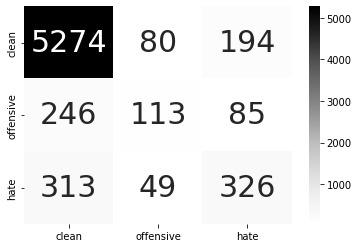

In [ ]:
# Text CNN 
import pandas as pd 
import numpy as np 
import re
import pickle

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import text, sequence

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit



train_y = y_train
dev_y = y_dev
test_y =y_test
MODEL_FILE = 'Text_CNN_model_1.h5'

def make_featues(X, y, tokenizer, is_one_hot_label=True):
    X = tokenizer.texts_to_sequences(X)
    X = sequence.pad_sequences(X, maxlen=sequence_length)
    if is_one_hot_label: 
        y = to_categorical(y, num_classes=3)

    return X, y
num_words = len(word_2_index)
tokenizer = text.Tokenizer(lower=False, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(train_X)
vocabulary_size = 10000
sequence_length = 100

embedding_dim = 300
batch_size = 256
epochs = 40
drop = 0.5

filter_sizes = [2,3,5]
num_filters = 32


# Make features
train_X, train_y = make_featues(train_X, train_y, tokenizer)
dev_X, dev_y = make_featues(dev_X, dev_y, tokenizer)
test_X, test_y = make_featues(test_X, test_y, tokenizer, is_one_hot_label=False)


inputs = Input(shape=(sequence_length,), dtype='int32')
embedding  = Embedding(input_dim=num_words+1,
                    output_dim=300,
                    input_length=max_len)(inputs)
reshape = Reshape((sequence_length,embedding_dim,1))(embedding)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)

maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
output = Dense(units=3, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

model.summary()

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(dev_X, dev_y))  
model.save(MODEL_FILE)

prediction = model.predict(test_X, batch_size=batch_size, verbose=0)
y_pred = prediction.argmax(axis=-1)

cf1 = confusion_matrix(test_y, y_pred)
print(cf1)

evaluation = f1_score(test_y, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(test_y, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(test_y, y_pred)
print("Accuracy: " + str(evaluation))

df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


#TextCNN + Pretrain fasttext Embedding 

In [ ]:
import pandas as pd 
import numpy as np 

DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/train.csv'
DEV_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/dev.csv'
TEST_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/test.csv'

# read data
train_data = pd.read_csv(DATA)
dev_data = pd.read_csv(DEV_DATA)
test_data = pd.read_csv(TEST_DATA)

print(len(train_data))
print(len(dev_data))
print(len(test_data))

X_train = train_data['free_text']
y_train = train_data['label_id'].values

X_dev = dev_data['free_text']
y_dev = dev_data['label_id'].values

X_test = test_data['free_text']
y_test = test_data['label_id'].values

24048
2672
6680


In [ ]:
!pip install pyvi
!pip install tensorflow-gpu==2.1
!pip install keras==2.3.1


In [ ]:
import pandas as pd 
import numpy as np 

from pyvi.ViTokenizer import ViTokenizer

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 300)     4370700     input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 100, 300, 1)  0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 99, 1, 32)    19232       reshape_1[0][0]                  
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


[[5327   61  160]
 [ 248  111   85]
 [ 312   39  337]]
F1 - micro: 0.8645209580838323
F1 - macro: 0.6004469591202467
Accuracy: 0.8645209580838323


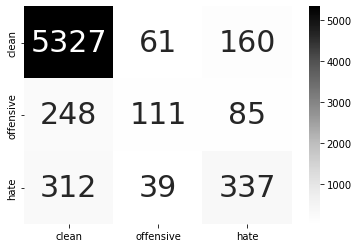

In [ ]:
# Text CNN 
import pandas as pd 
import numpy as np 
import re
import pickle

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import text, sequence

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
train_X = preprocessing(X_train)
dev_X = preprocessing(X_dev)
test_X = preprocessing(X_test)


train_y = y_train
dev_y = y_dev
test_y =y_test
EMBEDDING_FILE = '/content/drive/My Drive/DS202_Project/Train_model/cc.vi.300.vec'
MODEL_FILE = 'Text_CNN_model_2.h5'

def make_featues(X, y, tokenizer, is_one_hot_label=True):
    X = tokenizer.texts_to_sequences(X)
    X = sequence.pad_sequences(X, maxlen=sequence_length)
    if is_one_hot_label: 
        y = to_categorical(y, num_classes=3)

    return X, y

vocabulary_size = 10000
sequence_length = 100

embedding_dim = 300
batch_size = 256
epochs = 40
drop = 0.5

filter_sizes = [2,3,5]
num_filters = 32

# --------------LOAD WORD EMBEDDING -------------------------
embeddings_index = {}
with open(EMBEDDING_FILE, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


tokenizer = text.Tokenizer(lower=False, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(train_X)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

word_index = tokenizer.word_index
# num_words = min(vocabulary_size, len(word_index) + 1)
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i >= vocabulary_size:
        continue

    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Make features
train_X, train_y = make_featues(train_X, train_y, tokenizer)
dev_X, dev_y = make_featues(dev_X, dev_y, tokenizer)
test_X, test_y = make_featues(test_X, test_y, tokenizer, is_one_hot_label=False)


inputs = Input(shape=(sequence_length,), dtype='int32')
embedding = Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=sequence_length, weights=[embedding_matrix])(inputs)
reshape = Reshape((sequence_length,embedding_dim,1))(embedding)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)

maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
output = Dense(units=3, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

model.summary()

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(dev_X, dev_y))  
model.save(MODEL_FILE)

prediction = model.predict(test_X, batch_size=batch_size, verbose=0)
y_pred = prediction.argmax(axis=-1)

cf1 = confusion_matrix(test_y, y_pred)
print(cf1)

evaluation = f1_score(test_y, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(test_y, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(test_y, y_pred)
print("Accuracy: " + str(evaluation))

df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


#TextCNN + Pretrain W2V Embedding 

In [ ]:
import pandas as pd 
import numpy as np 

DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/train.csv'
DEV_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/dev.csv'
TEST_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/test.csv'

# read data
train_data = pd.read_csv(DATA)
dev_data = pd.read_csv(DEV_DATA)
test_data = pd.read_csv(TEST_DATA)

print(len(train_data))
print(len(dev_data))
print(len(test_data))

X_train = train_data['free_text']
y_train = train_data['label_id'].values

X_dev = dev_data['free_text']
y_dev = dev_data['label_id'].values

X_test = test_data['free_text']
y_test = test_data['label_id'].values

24048
2672
6680


In [ ]:
!pip install pyvi
!pip install tensorflow-gpu==2.1
!pip install keras==2.3.1


In [ ]:
import pandas as pd 
import numpy as np 

from pyvi.ViTokenizer import ViTokenizer



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 100, 300)     4370700     input_2[0][0]                    
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 100, 300, 1)  0           embedding_2[0][0]                
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 99, 1, 32)    19232       reshape_2[0][0]                  
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


[[5280   87  181]
 [ 234  122   88]
 [ 302   58  328]]
F1 - micro: 0.8577844311377246
F1 - macro: 0.5943115740756874
Accuracy: 0.8577844311377245


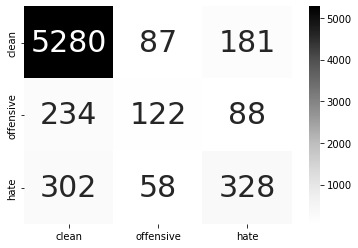

In [ ]:
# Text CNN 
import pandas as pd 
import numpy as np 
import re
import pickle

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import text, sequence

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

train_X = preprocessing(X_train)
dev_X = preprocessing(X_dev)
test_X = preprocessing(X_test)

train_y = y_train
dev_y = y_dev
test_y =y_test
EMBEDDING_FILE = '/content/drive/MyDrive/Download(Win11)/W2V_ner.vec/W2V_ner.vec'
MODEL_FILE = 'Text_CNN_model_3.h5'

def make_featues(X, y, tokenizer, is_one_hot_label=True):
    X = tokenizer.texts_to_sequences(X)
    X = sequence.pad_sequences(X, maxlen=sequence_length)
    if is_one_hot_label: 
        y = to_categorical(y, num_classes=3)

    return X, y

vocabulary_size = 10000
sequence_length = 100

embedding_dim = 300
batch_size = 256
epochs = 40
drop = 0.5

filter_sizes = [2,3,5]
num_filters = 32

# --------------LOAD WORD EMBEDDING -------------------------
embeddings_index = {}
with open(EMBEDDING_FILE, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


tokenizer = text.Tokenizer(lower=False, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(train_X)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

word_index = tokenizer.word_index
# num_words = min(vocabulary_size, len(word_index) + 1)
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i >= vocabulary_size:
        continue

    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Make features
train_X, train_y = make_featues(train_X, train_y, tokenizer)
dev_X, dev_y = make_featues(dev_X, dev_y, tokenizer)
test_X, test_y = make_featues(test_X, test_y, tokenizer, is_one_hot_label=False)


inputs = Input(shape=(sequence_length,), dtype='int32')
embedding = Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=sequence_length, weights=[embedding_matrix])(inputs)
reshape = Reshape((sequence_length,embedding_dim,1))(embedding)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)

maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
output = Dense(units=3, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

model.summary()

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(dev_X, dev_y))  
model.save(MODEL_FILE)

prediction = model.predict(test_X, batch_size=batch_size, verbose=0)
y_pred = prediction.argmax(axis=-1)

cf1 = confusion_matrix(test_y, y_pred)
print(cf1)

evaluation = f1_score(test_y, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(test_y, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(test_y, y_pred)
print("Accuracy: " + str(evaluation))

df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

#TextCNN + Pretrain PhoW2V Embedding 

In [ ]:
import pandas as pd 
import numpy as np 

DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/train.csv'
DEV_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/dev.csv'
TEST_DATA = '/content/drive/MyDrive/Download(Win11)/vihsd/data/vihsd/vihsd/test.csv'

# read data
train_data = pd.read_csv(DATA)
dev_data = pd.read_csv(DEV_DATA)
test_data = pd.read_csv(TEST_DATA)

print(len(train_data))
print(len(dev_data))
print(len(test_data))

X_train = train_data['free_text']
y_train = train_data['label_id'].values

X_dev = dev_data['free_text']
y_dev = dev_data['label_id'].values

X_test = test_data['free_text']
y_test = test_data['label_id'].values

24048
2672
6680


In [ ]:
!wget https://public.vinai.io/word2vec_vi_words_300dims.zip
!unzip word2vec_vi_words_300dims.zip

--2021-12-16 04:21:50--  https://public.vinai.io/word2vec_vi_words_300dims.zip
Resolving public.vinai.io (public.vinai.io)... 65.8.49.95, 65.8.49.47, 65.8.49.107, ...
Connecting to public.vinai.io (public.vinai.io)|65.8.49.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2315583928 (2.2G) [application/zip]
Saving to: ‘word2vec_vi_words_300dims.zip’

word2vec_vi_words_3 100%[===================>]   2.16G  25.0MB/s    in 97s     

2021-12-16 04:23:28 (22.8 MB/s) - ‘word2vec_vi_words_300dims.zip’ saved [2315583928/2315583928]

Archive:  word2vec_vi_words_300dims.zip
  inflating: word2vec_vi_words_300dims.txt  


In [ ]:
!pip install pyvi
!pip install tensorflow-gpu==2.1
!pip install keras==2.3.1


In [ ]:
import pandas as pd 
import numpy as np 

from pyvi.ViTokenizer import ViTokenizer



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 300)     4370700     input_1[0][0]                    
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 100, 300, 1)  0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 99, 1, 32)    19232       reshape_1[0][0]                  
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


[[5282   95  171]
 [ 230  128   86]
 [ 296   54  338]]
F1 - micro: 0.8604790419161676
F1 - macro: 0.604069882477699
Accuracy: 0.8604790419161676


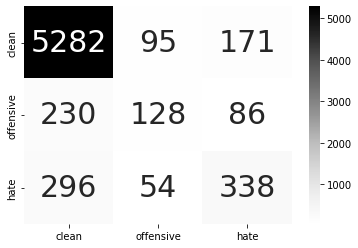

In [ ]:
# Text CNN 
import pandas as pd 
import numpy as np 
import re
import pickle

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import text, sequence

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

train_X = preprocessing(X_train)
dev_X = preprocessing(X_dev)
test_X = preprocessing(X_test)

train_y = y_train
dev_y = y_dev
test_y =y_test
EMBEDDING_FILE = '/content/word2vec_vi_words_300dims.txt'
MODEL_FILE = 'Text_CNN_model_4.h5'

def make_featues(X, y, tokenizer, is_one_hot_label=True):
    X = tokenizer.texts_to_sequences(X)
    X = sequence.pad_sequences(X, maxlen=sequence_length)
    if is_one_hot_label: 
        y = to_categorical(y, num_classes=3)

    return X, y

vocabulary_size = 10000
sequence_length = 100

embedding_dim = 300
batch_size = 256
epochs = 40
drop = 0.5

filter_sizes = [2,3,5]
num_filters = 32

# --------------LOAD WORD EMBEDDING -------------------------
embeddings_index = {}
with open(EMBEDDING_FILE, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs


tokenizer = text.Tokenizer(lower=False, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(train_X)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

word_index = tokenizer.word_index
# num_words = min(vocabulary_size, len(word_index) + 1)
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
    if i >= vocabulary_size:
        continue

    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Make features
train_X, train_y = make_featues(train_X, train_y, tokenizer)
dev_X, dev_y = make_featues(dev_X, dev_y, tokenizer)
test_X, test_y = make_featues(test_X, test_y, tokenizer, is_one_hot_label=False)


inputs = Input(shape=(sequence_length,), dtype='int32')
embedding = Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=sequence_length, weights=[embedding_matrix])(inputs)
reshape = Reshape((sequence_length,embedding_dim,1))(embedding)

conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
conv_1 = Conv2D(num_filters, kernel_size=(filter_sizes[1], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)
conv_2 = Conv2D(num_filters, kernel_size=(filter_sizes[2], embedding_dim), padding='valid', kernel_initializer='normal', activation='elu')(reshape)

maxpool_0 = MaxPool2D(pool_size=(sequence_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)
maxpool_1 = MaxPool2D(pool_size=(sequence_length - filter_sizes[1] + 1, 1), strides=(1,1), padding='valid')(conv_1)
maxpool_2 = MaxPool2D(pool_size=(sequence_length - filter_sizes[2] + 1, 1), strides=(1,1), padding='valid')(conv_2)

concatenated_tensor = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
flatten = Flatten()(concatenated_tensor)
dropout = Dropout(drop)(flatten)
output = Dense(units=3, activation='softmax')(dropout)

# this creates a model that includes
model = Model(inputs=inputs, outputs=output)

model.summary()

checkpoint = ModelCheckpoint('weights.{epoch:03d}-{val_acc:.4f}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto')
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_X, train_y, batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(dev_X, dev_y))  
model.save(MODEL_FILE)

prediction = model.predict(test_X, batch_size=batch_size, verbose=0)
y_pred = prediction.argmax(axis=-1)

cf1 = confusion_matrix(test_y, y_pred)
print(cf1)

evaluation = f1_score(test_y, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(test_y, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(test_y, y_pred)
print("Accuracy: " + str(evaluation))

df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

#**Mô hình BERT Pre-train**

##Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install transformers==4.3.0

     |████████████████████████████████| 1.8 MB 5.4 MB/s 
     |████████████████████████████████| 895 kB 42.6 MB/s 
     |████████████████████████████████| 3.3 MB 28.2 MB/s 


In [ ]:
pip install pyvi

     |████████████████████████████████| 8.5 MB 5.7 MB/s 
     |████████████████████████████████| 743 kB 40.2 MB/s 


In [ ]:
pip install vncorenlp

     |████████████████████████████████| 2.6 MB 5.4 MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645951 sha256=60e5cf67a84f2b3c0a1faaa7e41ff30656f33df5c85bbaf00cc7e1c15ea90b4d
  Stored in directory: /root/.cache/pip/wheels/0c/d8/f2/d28d97379b4f6479bf51247c8dfd57fa00932fa7a74b6aab29
Successfully built vncorenlp


In [ ]:
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

--2021-12-21 08:15:50--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M   127MB/s    in 0.2s    

2021-12-21 08:15:50 (127 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2021-12-21 08:15:50--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting respon

## Data loader and pre-processing

In [ ]:
import pandas as pd
# load data
train = pd.read_csv("/content/drive/MyDrive/Kì 7/NLP trong KHDL/DOAN_NLPFORDS/Data/train.csv", index_col=False)
dev = pd.read_csv("/content/drive/MyDrive/Kì 7/NLP trong KHDL/DOAN_NLPFORDS/Data/dev.csv", index_col=False)
test = pd.read_csv("/content/drive/MyDrive/Kì 7/NLP trong KHDL/DOAN_NLPFORDS/Data/test.csv", index_col=False)

train.reset_index(drop=True)

print(len(train))
print(len(dev))
print(len(test))

24048
2672
6680


In [ ]:
from vncorenlp import VnCoreNLP

vncorenlp = VnCoreNLP("vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import re
import sys
from pyvi.ViTokenizer import ViTokenizer
import numpy as np

In [ ]:
pip install viet_text_tools


##Tiền xử lý

In [ ]:
def pre_process_features(X, y, tokenized=True, lowercased=True):
    X = [p for p in list(X)]
    for idx, ele in enumerate(X):
        if not ele:
            np.delete(X, idx)
            np.delete(y, idx)
    return X, y

In [ ]:
X_train = preprovessing(X_train)
X_dev = preprovessing(X_dev)
X_test = preprovessing(X_test)

## Model


### PhoBERT

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

Step,Training Loss
500,0.537400
1000,0.375500
1500,0.336200
2000,0.266900
2500,0.224500
3000,0.199300
3500,0.154400


[[5236  140  172]
 [ 200  156   88]
 [ 207   73  408]]
F1 - micro: 0.8682634730538922
F1 - macro: 0.6404285642229496
Accuracy: 0.8682634730538922


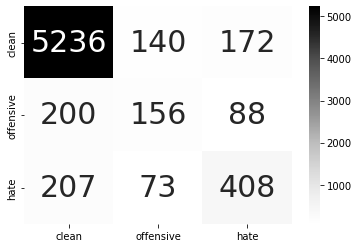

In [ ]:
# PhoBERT
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

train_X, train_y = pre_process_features(X_train, y_train, tokenized=True, lowercased = False)
dev_X, dev_y = pre_process_features(X_dev, y_dev, tokenized=True, lowercased = False)
test_X, test_y = pre_process_features(X_test, y_test, tokenized=True, lowercased = False)
  
model = AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base",use_fast=False)

import torch

class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_encodings = tokenizer(train_X, truncation=True, padding=True, max_length=100)
dev_encodings = tokenizer(dev_X, truncation=True, padding=True, max_length=100)
test_encodings = tokenizer(test_X, truncation=True, padding=True, max_length=100)

train_dataset = BuildDataset(train_encodings, y_train)
dev_dataset = BuildDataset(dev_encodings, y_dev)
test_dataset = BuildDataset(test_encodings, y_test)

training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/Kì 7/NLP trong KHDL/DOAN_NLPFORDS/Code/Dũng/transformer_model/phobert-v3/',          
    num_train_epochs=5,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=32,   
    warmup_steps=500,                
    weight_decay=0.001,
    no_cuda=False,
    do_eval=True
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

trainer.train()
trainer.save_model("/content/drive/MyDrive/Kì 7/NLP trong KHDL/DOAN_NLPFORDS/Code/Dũng/transformer_model/phobert-v3/")

y_pred_classify = trainer.predict(test_dataset)

y_pred = np.argmax(y_pred_classify.predictions, axis=-1)
y_true = test_y

cf1 = confusion_matrix(y_true, y_pred)
print(cf1)

evaluation = f1_score(y_true, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(y_true, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))
evaluation = accuracy_score(y_true, y_pred)
print("Accuracy: " + str(evaluation))
# Show out the confusion matrix
df_cm1 = pd.DataFrame(cf1, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm1, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})

### BERT4News

Downloading:   0%|          | 0.00/551 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/537M [00:00<?, ?B/s]

Some weights of the model checkpoint at NlpHUST/vibert4news-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

Downloading:   0%|          | 0.00/411k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Step,Training Loss
500,0.509200
1000,0.421700
1500,0.398500
2000,0.311600
2500,0.292200
3000,0.290300


[[5341   57  150]
 [ 232  117   95]
 [ 262   42  384]]
F1 - micro: 0.8745508982035927
F1 - macro: 0.6253686333521847
Accuracy: 0.8745508982035928


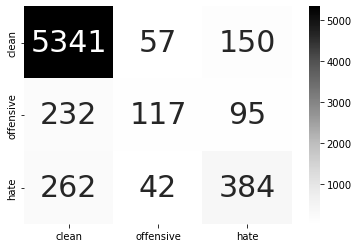

In [ ]:
# Bert4news
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, BertTokenizer, BertForSequenceClassification

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

train_X, train_y = pre_process_features(X_train, y_train, tokenized=False, lowercased = False)
dev_X, dev_y = pre_process_features(X_dev, y_dev, tokenized=False, lowercased = False)
test_X, test_y = pre_process_features(X_test, y_test, tokenized=False, lowercased = False)
  
model = AutoModelForSequenceClassification.from_pretrained("NlpHUST/vibert4news-base-cased", num_labels = 3)
tokenizer = AutoTokenizer.from_pretrained("NlpHUST/vibert4news-base-cased",use_fast=False)

import torch

class BuildDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_encodings = tokenizer(train_X, truncation=True, padding=True, max_length=100)
dev_encodings = tokenizer(dev_X, truncation=True, padding=True, max_length=100)
test_encodings = tokenizer(test_X, truncation=True, padding=True, max_length=100)

train_dataset = BuildDataset(train_encodings, train_y)
dev_dataset = BuildDataset(dev_encodings, dev_y)
test_dataset = BuildDataset(test_encodings, test_y)

training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/Kì 7/NLP trong KHDL/DOAN_NLPFORDS/Code/Dũng/bert4news-v8/',          
    num_train_epochs=5,              
    per_device_train_batch_size=32,  
    per_device_eval_batch_size=32,   
    warmup_steps=500,                
    weight_decay=0.001,
    no_cuda=False,
    do_eval=True
)

trainer = Trainer(
    model=model,                         
    args=training_args,                  
    train_dataset=train_dataset,         
    eval_dataset=dev_dataset             
)

trainer.train()
trainer.save_model("/content/drive/MyDrive/Kì 7/NLP trong KHDL/DOAN_NLPFORDS/Code/Dũng/bert4news-v9/")

y_pred_classify = trainer.predict(test_dataset)

y_pred = np.argmax(y_pred_classify.predictions, axis=-1)
y_true = test_y

cf2 = confusion_matrix(y_true, y_pred)
print(cf2)

evaluation = f1_score(y_true, y_pred, average='micro')

print("F1 - micro: " + str(evaluation))

evaluation = f1_score(y_true, y_pred, average='macro')
print("F1 - macro: " + str(evaluation))

evaluation = accuracy_score(y_true, y_pred)
print("Accuracy: " + str(evaluation))
# Show out the confusion matrix
df_cm2 = pd.DataFrame(cf2, index = ["clean","offensive","hate"],
                  columns = ["clean","offensive","hate"])
plt.clf()
sn.heatmap(df_cm2, annot=True, cmap="Greys",fmt='g', cbar=True, annot_kws={"size": 30})